In [63]:
np.round(F_qiskit, 2)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  1.-0.j, -1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+1.j, -0.-1.j],
       [ 1.+0.j, -1.+0.j, -0.-1.j,  0.+1.j]])

In [87]:
from qiskit.quantum_info import Operator
np.round(Operator(qk.circuit.library.QFT(2, do_swaps=False)).data * 2, 2)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+1.j, -0.-1.j],
       [ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j, -0.-1.j,  0.+1.j]])

In [65]:
Operator(qk.circuit.library.QFT(2)).equiv(Operator(F_qiskit), atol=1e-2)

False

In [66]:
one = Statevector.from_int(1, dims=(2,2))

NameError: name 'Statevector' is not defined

In [83]:
from qiskit.circuit.library import QFT
import qiskit as qk
qft = qk.circuit.library.QFT(2)
zero = qk.quantum_info.Statevector.from_int(0, dims=(2,2))
one = qk.quantum_info.Statevector.from_int(1, dims=(2,2))
two = qk.quantum_info.Statevector.from_int(2, dims=(2,2))
three = qk.quantum_info.Statevector.from_int(3, dims=(2,2))
print(one)
print(two)
print(three)
print(one @ qft)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


In [79]:
one = qk.QuantumCircuit(2)
one.x(0)

In [80]:
print(one)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          


In [81]:
sv = qk.quantum_info.Statevector.from_label('00').evolve(one)

In [82]:
sv

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

In [75]:
# sv_aer = qk.execute(one.compose(qft), qk.Aer.get_backend('statevector_simulator')).result().get_statevector()
sv_aer = qk.execute(one, qk.Aer.get_backend('statevector_simulator')).result().get_statevector()

In [76]:
sv_aer

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [86]:
print(QFT(3))

     ┌───┐                                  
q_0: ┤ H ├─■──────■───────────────────────X─
     └───┘ │pi/2  │     ┌───┐             │ 
q_1: ──────■──────┼─────┤ H ├─■───────────┼─
                  │pi/4 └───┘ │pi/2 ┌───┐ │ 
q_2: ─────────────■───────────■─────┤ H ├─X─
                                    └───┘   


In [94]:
1j**1.5 / 2**1.5

(-0.24999999999999997+0.25j)

# QFT madness?

The QFT is defined as the mapping

$$
\mathcal{F}: |j\rangle \mapsto \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n - 1} e^{2\pi i j k / 2^n} |k\rangle
$$

The circuit, according to Nielsen & Chuang, Wikipedia, etc. is

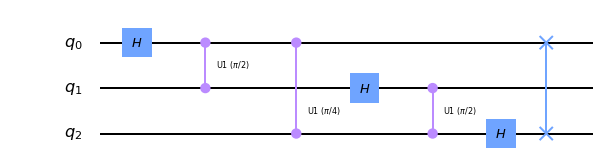

In [112]:
from qiskit.circuit.library import QFT
QFT(3).draw(output='mpl')

Calculating by hand, for 2 qubits, the QFT on state $|1\rangle = |^b01\rangle$ should produce ($b$ indicates bit-representation)

$$
\mathcal F |1\rangle = \frac{1}{2} \sum_{k=0}^{3} i^k |k\rangle = 
\frac{1}{2} \left(|0\rangle +  i |1\rangle - |2\rangle - i|3\rangle\right)
$$

Qiskit has a reversed bit ordering w.r.t. to the Physics community and the definition of the Fourier transform, hence the QFT is actually described by ($q$ indicates Qiskit ordering)

$$
\mathcal{F}: |_q j\rangle \mapsto \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n - 1} e^{2\pi i j k / 2^n} |_qk\rangle
$$

where $|_q x\rangle = |_q^b x_{n-1} \ldots x_0\rangle = |^b x_0 \ldots x_{n-1}\rangle$.
E.g. $|_q 4\rangle = |_q ^b 100\rangle = |^b 001\rangle = |1\rangle$.
This implies identities such as 

$$
\langle_q 4|\mathcal F |_q 4\rangle = \langle 1 |\mathcal F |_q 4\rangle = \langle 1 | \mathcal F | 1\rangle.
$$

Therefore, calculating the QFT on state $|_q 1\rangle$ should produce (note that in the exponent $j$ became $2$, since $|_q 1\rangle = |2\rangle$.

$$
\mathcal F |_q 1\rangle = \frac{1}{2} \sum_{k=0}^{3} i^{2 k} |_q k\rangle = 
\frac{1}{2} \left(|0\rangle - |_q 2\rangle + |_q 1\rangle - |_q 3\rangle\right) = 
\frac{1}{2} \left(|_ q0\rangle + |_q 1\rangle - |_q 2\rangle - |_q 3\rangle\right)
$$

Which is produced by Qiskit:

In [114]:
from qiskit.quantum_info import Statevector
one = Statevector.from_int(1, dims=(2,2))
print(one @ QFT(2))

Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


Note that the `Statevector` shows the amplitudes of the state $\Psi$ ordered as 

$$
    \left[ \langle_q 0 | \Psi\rangle, \langle_q 1 | \Psi\rangle, \ldots \right]
$$

### Adding Swap operations

Swap operations can be used to revert the qubit ordering. Hence they can be used to change between Qiskit and Physics-community order.

Let $\mathrm{RSwap}$ denote the operation of applying consecutive swap operations to qubits $(0, n-1), (1, n-2), \ldots$. Then

$$
\mathrm{RSwap}|_q x\rangle = |x\rangle.
$$

Using this operation we can interchange between representations of the QFT:

$$
\mathrm{RSwap} \mathcal F |_q 1\rangle = \frac{1}{2} \sum_{k=0}^{3} i^{2k} |k\rangle = 
\frac{1}{2} \left(|0\rangle - |1\rangle + |2\rangle - |3\rangle\right)
$$

Which is reproduced as:

In [122]:
from qiskit import QuantumCircuit
rswap = QuantumCircuit(2)
rswap.swap(0, 1)

one = Statevector.from_int(1, dims=(2,2))
print(one.evolve(QFT(2)).evolve(rswap))

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


Since the QFT applies the $\mathrm{RSwap}$ operation at the end of the circuit and the $\mathrm{RSwap}$ is its onw inverse, we can just drop the QFT's swap operations instead:

In [118]:
one = Statevector.from_int(1, dims=(2,2))
print(one @ QFT(2, do_swaps=False))

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


Finally, applying the $\mathrm{RSwap}$ before the QFT takes us back to the textbook result of the QFT. Remember this was

$$
\mathcal F |1\rangle = \frac{1}{2} \sum_{k=0}^{3} i^k |k\rangle = 
\frac{1}{2} \left(|0\rangle +  i |1\rangle - |2\rangle - i|3\rangle\right)
$$


In [124]:
textbook = QuantumCircuit(2).compose(rswap).compose(QFT(2)).compose(rswap)
print(one.evolve(textbook))

Statevector([ 5.00000000e-01+0.j ,  7.85046229e-17+0.5j,
             -5.00000000e-01+0.j , -7.85046229e-17-0.5j],
            dims=(2, 2))


# Scratch space

In [2]:
import qiskit as qk
n = 2
qft = qk.QuantumCircuit(2)
qft.swap(0, 1)
qft = qft.compose(qk.circuit.library.QFT(n, do_swaps=True))
# qft = qk.circuit.library.QFT(n, do_swaps=True)
zero = qk.quantum_info.Statevector.from_int(0, dims=(2,)*n)
one = qk.quantum_info.Statevector.from_int(1, dims=(2,)*n)
two = qk.quantum_info.Statevector.from_int(2, dims=(2,)*n)
three = qk.quantum_info.Statevector.from_int(3, dims=(2,)*n)
# four = qk.quantum_info.Statevector.from_int(4, dims=(2,)*n)
print(zero @ qft)
print(one @ qft)
print(two @ qft)
print(three @ qft)
# print(four @ qft)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector([ 5.00000000e-01+0.j , -5.00000000e-01+0.j ,
              7.85046229e-17+0.5j, -7.85046229e-17-0.5j],
            dims=(2, 2))
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))
Statevector([ 5.00000000e-01+0.j , -5.00000000e-01+0.j ,
             -7.85046229e-17-0.5j,  7.85046229e-17+0.5j],
            dims=(2, 2))


In [1]:
import numpy as np
n = 2
omega = np.exp(2 * np.pi * 1j / 2**n)
F = np.array([[omega ** (k * j) for j in range(2**n)] for k in range(2**n)])# / np.sqrt(2**n)

F_qiskit = np.empty((4, 4), dtype=complex)
for i in range(2 ** n):
    i_qiskit = int(bin(i)[2:].zfill(n)[::-1], 2)
    for j in range(2 ** n):
        j_qiskit = int(bin(j)[2:].zfill(n)[::-1], 2)
        F_qiskit[i_qiskit, j_qiskit] = F[i, j]
        #if i != j:
        #    F[j_qiskit, i_qiskit] = F[i, j]